Load the Dataset from kaggle

In [1]:
! pip install -q kaggle

In [2]:
# Use the below code to mount your google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
pwd

'/content'

In [5]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [6]:
ls

 19.PNG
 20.PNG
 21.PNG
 22.PNG
'Akshay Singh.gdoc'
 Astulll/
'Atul Singh.gdoc'
'BEAUTIFUL SOUP.gdoc'
'Call@District Co(00917208626647)_20201227223826.mp3'
'Call@Randwa pras(00919321578556)_20201227224002.mp3'
'Call@sanket tamo(00917738583087)_20201227223402.mp3'
'Codes(R).gdoc'
'Colab Notebooks'/
 DataDictionary-14-10-17.gsheet
'DATA VISUALIZATION in R.gdoc'
'Data Visualization Python.gdoc'
'Decision Tree'/
'Digit Recognizer'/
 DL1.png
 dl2.png
 dl3.PNG
 DPLYR.gdoc
'EDA(EXPLORATORY DATA ANALYSIS).gdoc'
 Family/
'FLASK FINAL.gdoc'
 FLASK.gdoc
 Friends/
 IMG_20160809_113523.jpg
 IMG_20201125_113504.jpg
 Kaggle/
'Mall_Customers (1).gsheet'
 Mall_Customers.gsheet
 my-resume.docx
'New Doc 2018-08-24_1.pdf'
'Numpy Basics.gdoc'
'Pandas Basics.gdoc'
 PANDAS.gdoc
'PANDAS LIBRARY.gdoc'
 Projects/
'Projects- PYTHON'/
 python/
'PYTHON -- 1.gdoc'
'PYTHON -- 2.gdoc'
'PYTHON -- 3.gdoc'
'PYTHON -- 4.gdoc'
'PYTHON -- 5.gdoc'
'PYTHON CODES.gdoc'
'R(3).gdoc'
'R Language.gdoc'
 R-Packages.gdoc
'SAS 2.gdo

In [7]:
%cd Kaggle

/content/gdrive/My Drive/Kaggle


In [8]:
ls

age-gender-and-ethnicity-face-data-csv.zip  kaggle.json
age_gender.csv                              model.png


In [9]:
!kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv

age-gender-and-ethnicity-face-data-csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
%ls

age-gender-and-ethnicity-face-data-csv.zip  kaggle.json
age_gender.csv                              model.png


In [11]:
#!unzip \*.zip  && rm *.zip

In [12]:
%ls

age-gender-and-ethnicity-face-data-csv.zip  kaggle.json
age_gender.csv                              model.png


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
pd.set_option("Display.max_columns", None)

In [15]:
%time df = pd.read_csv(r'/content/gdrive/MyDrive/Kaggle/age_gender.csv')
print("Dataset has been loaded successfully")

CPU times: user 1.74 s, sys: 317 ms, total: 2.06 s
Wall time: 6.84 s
Dataset has been loaded successfully


In [16]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [17]:
df.shape

(23705, 5)

In [18]:
print("\033[1m" + 'Number of Rows in our dataset is:' + "\033[0m",df.shape[0])
print("\033[1m" + 'Number of Columns in our dataset is:' + "\033[0m",df.shape[1])

Number of Rows in our dataset is: 23705
Number of Columns in our dataset is: 5


In [19]:
len(df['pixels'][0])

8917

So each Pixel or image has total of 8917 array or number defined

In [20]:
df.dtypes 

age           int64
ethnicity     int64
gender        int64
img_name     object
pixels       object
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [22]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,23705,NaN,NaN,NaN,33.3009,19.8857,1,23,29,45,116
ethnicity,23705,NaN,NaN,NaN,1.26923,1.34564,0,0,1,2,4
gender,23705,NaN,NaN,NaN,0.477283,0.499494,0,0,0,1,1
img_name,23705,23479,20170110173815028.jpg.chip.jpg,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixels,23705,23315,10 21 33 31 42 54 66 75 73 73 80 87 91 96 102 ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.columns

Index(['age', 'ethnicity', 'gender', 'img_name', 'pixels'], dtype='object')

**Missing Value Treatment**

In [24]:
df.isnull().sum().sum()

0

In [25]:
missing_data = df.isnull().sum().sort_values(ascending = False)
missing_percent = round((df.isnull().sum() / len(df))*100, 2).sort_values(ascending = False)
missing_value = pd.concat([missing_data, missing_percent], keys = ["Total", "Percentage"], axis = 1)
missing_value[missing_value["Percentage"] > 0]

,Total,Percentage


In [26]:
print("\033[1m" + "Total number of records missing in Train data:" + "\033[0m",df.isnull().sum().sum())

Total number of records missing in Train data: 0


**Converting Pixels column into array**

In [27]:
pixel_array = df['pixels']
pixel_array

0        129 128 128 126 127 130 133 135 139 142 145 14...
1        164 74 111 168 169 171 175 182 184 188 193 199...
2        67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3        193 197 198 200 199 200 202 203 204 205 208 21...
4        202 205 209 210 209 209 210 211 212 214 218 21...
                               ...                        
23700    127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701    23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702    59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703    45 108 120 156 206 197 140 180 191 199 204 207...
23704    156 161 160 165 170 173 166 177 183 191 187 18...
Name: pixels, Length: 23705, dtype: object

In [28]:
pixel_array = pixel_array.apply(lambda x : np.array(x.split(), dtype = np.float32))
pixel_array

0        [129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133...
1        [164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175....
2        [67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79....
3        [193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202...
4        [202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210...
                               ...                        
23700    [127.0, 100.0, 94.0, 81.0, 77.0, 77.0, 74.0, 9...
23701    [23.0, 28.0, 32.0, 35.0, 42.0, 47.0, 68.0, 85....
23702    [59.0, 50.0, 37.0, 40.0, 34.0, 19.0, 30.0, 101...
23703    [45.0, 108.0, 120.0, 156.0, 206.0, 197.0, 140....
23704    [156.0, 161.0, 160.0, 165.0, 170.0, 173.0, 166...
Name: pixels, Length: 23705, dtype: object

In [29]:
type(pixel_array)

pandas.core.series.Series

In [30]:
df_1 = pd.DataFrame.copy(df)
df = df.drop('img_name', axis = 1)
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [31]:
df['pixels'] = df["pixels"].apply(lambda x: np.array(x.split(),dtype="float32"))
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


**Age**

In [32]:
df['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
103       1
111       1
Name: age, Length: 104, dtype: int64

In [33]:
df['age'].min(), df['age'].max()

(1, 116)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103]),
 <a list of 104 Text major ticklabel objects>)

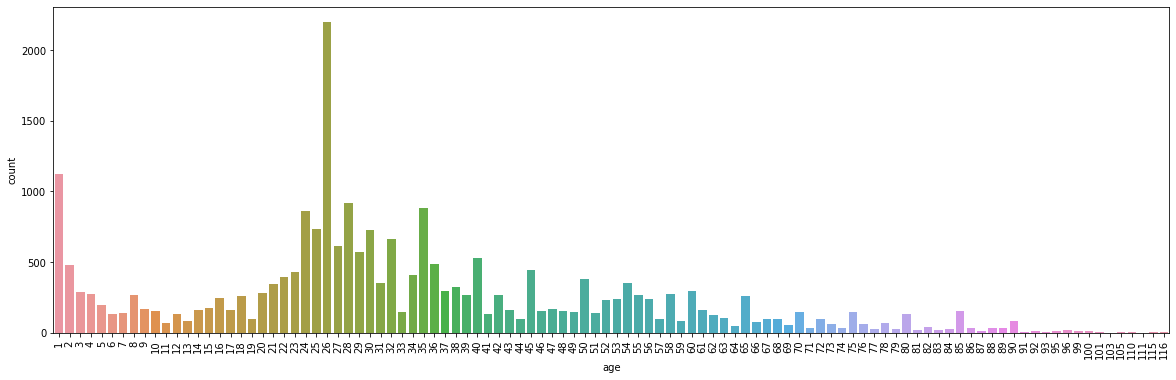

In [34]:
plt.figure(figsize = (20, 6))
sns.countplot(df['age'])
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text major ticklabel objects>)

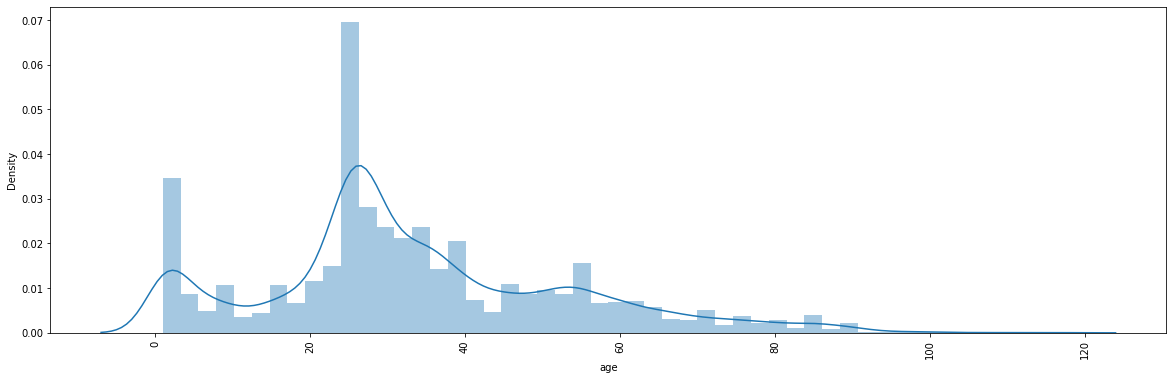

In [35]:
plt.figure(figsize = (20, 6))
sns.distplot(df['age'])
plt.xticks(rotation = 90)

**Ethnicity**

In [36]:
df['ethnicity'].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [37]:
round(df['ethnicity'].value_counts(normalize = True) * 100, 4)

0    42.5142
1    19.0930
3    16.7686
2    14.4864
4     7.1377
Name: ethnicity, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

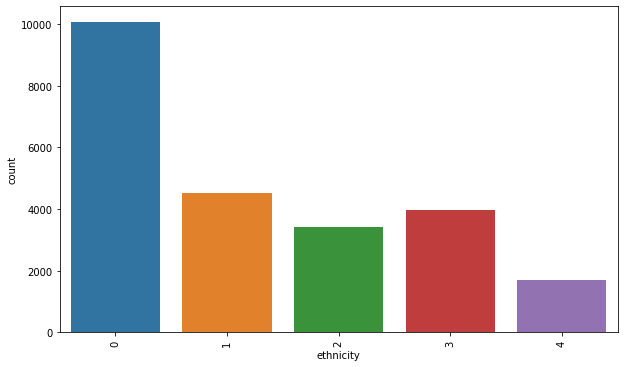

In [38]:
plt.figure(figsize = (10, 6))
sns.countplot(df['ethnicity'])
plt.xticks(rotation = 90)

**Gender**

In [39]:
df['gender'].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [40]:
round(df['gender'].value_counts(normalize = True) * 100, 4)

0    52.2717
1    47.7283
Name: gender, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

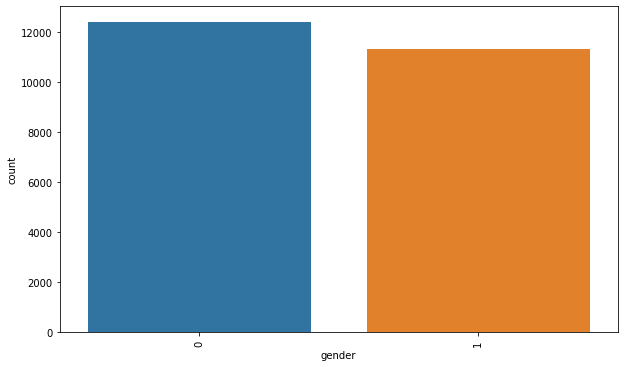

In [41]:
plt.figure(figsize = (10, 6))
sns.countplot(df['gender'])
plt.xticks(rotation = 90)

In [42]:
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [43]:
# Let's check the shape of Pixels
pixel_shape = df['pixels'][0]
pixel_shape

array([129., 128., 128., ..., 146., 146., 146.], dtype=float32)

In [44]:
type(pixel_shape), pixel_shape.shape, pixel_shape.ndim

(numpy.ndarray, (2304,), 1)

In [45]:
np.sqrt(2304)

48.0

Converting the Pixel variable into appropriate format

In [46]:
list(df['pixels'])

[array([129., 128., 128., ..., 146., 146., 146.], dtype=float32),
 array([164.,  74., 111., ..., 182., 170., 148.], dtype=float32),
 array([ 67.,  70.,  71., ..., 112., 111., 108.], dtype=float32),
 array([193., 197., 198., ..., 235., 239., 246.], dtype=float32),
 array([202., 205., 209., ..., 167., 163., 161.], dtype=float32),
 array([195., 198., 200., ..., 105., 119., 140.], dtype=float32),
 array([208., 216., 217., ..., 210., 211., 213.], dtype=float32),
 array([ 99., 142., 169., ...,   0.,   0.,   0.], dtype=float32),
 array([127., 127., 133., ..., 175., 175., 172.], dtype=float32),
 array([199., 211., 211., ..., 225., 210., 228.], dtype=float32),
 array([136., 138., 145., ..., 200., 205., 210.], dtype=float32),
 array([253., 253., 253., ..., 182., 182., 178.], dtype=float32),
 array([223., 222., 226., ..., 224., 223., 205.], dtype=float32),
 array([181., 185., 186., ..., 178., 184., 191.], dtype=float32),
 array([167., 172., 175., ..., 166., 168., 170.], dtype=float32),
 array([ 9

In [47]:
np.array(list(df['pixels']))

array([[129., 128., 128., ..., 146., 146., 146.],
       [164.,  74., 111., ..., 182., 170., 148.],
       [ 67.,  70.,  71., ..., 112., 111., 108.],
       ...,
       [ 59.,  50.,  37., ...,  98.,  78.,  78.],
       [ 45., 108., 120., ...,  32.,  35.,  35.],
       [156., 161., 160., ..., 190., 184., 174.]], dtype=float32)

In [48]:
X = np.array(list(df['pixels']))
X

array([[129., 128., 128., ..., 146., 146., 146.],
       [164.,  74., 111., ..., 182., 170., 148.],
       [ 67.,  70.,  71., ..., 112., 111., 108.],
       ...,
       [ 59.,  50.,  37., ...,  98.,  78.,  78.],
       [ 45., 108., 120., ...,  32.,  35.,  35.],
       [156., 161., 160., ..., 190., 184., 174.]], dtype=float32)

In [49]:
X = X.reshape(X.shape[0],48,48,1)
X

array([[[[129.],
         [128.],
         [128.],
         ...,
         [118.],
         [ 99.],
         [ 53.]],

        [[130.],
         [129.],
         [128.],
         ...,
         [117.],
         [ 98.],
         [ 52.]],

        [[131.],
         [129.],
         [130.],
         ...,
         [114.],
         [ 97.],
         [ 50.]],

        ...,

        [[121.],
         [138.],
         [147.],
         ...,
         [151.],
         [150.],
         [148.]],

        [[117.],
         [137.],
         [146.],
         ...,
         [149.],
         [148.],
         [148.]],

        [[115.],
         [135.],
         [142.],
         ...,
         [146.],
         [146.],
         [146.]]],


       [[[164.],
         [ 74.],
         [111.],
         ...,
         [111.],
         [111.],
         [104.]],

        [[179.],
         [ 70.],
         [128.],
         ...,
         [112.],
         [113.],
         [108.]],

        [[176.],
         [ 71.],
      

In [50]:
X.shape

(23705, 48, 48, 1)

Age: 1
Ethnicity: 2
Gender: 0



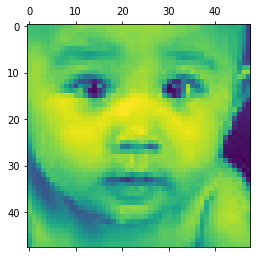

In [51]:
print("\033[1m" + "Age: " + "\033[0m", df['age'][0], '\n',
      "\033[1m" + "Ethnicity: " + "\033[0m", df['ethnicity'][0], '\n'
      "\033[1m" + "Gender: " + "\033[0m", df['gender'][0], '\n', sep = "")
plt.matshow(X[0][:,:,0])

Age: 1
Ethnicity: 2
Gender: 1



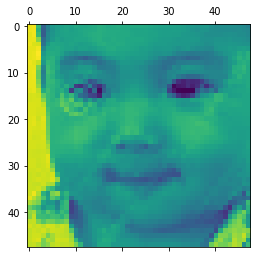

In [52]:
print("\033[1m" + "Age: " + "\033[0m", df['age'][1029], '\n',
      "\033[1m" + "Ethnicity: " + "\033[0m", df['ethnicity'][1029], '\n'
      "\033[1m" + "Gender: " + "\033[0m", df['gender'][1029], '\n', sep = "")
plt.matshow(X[1029][:,:,0])

Age: 35
Ethnicity: 1
Gender: 0



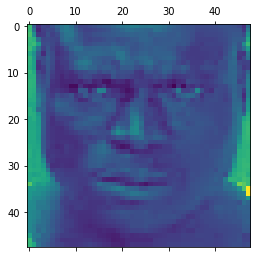

In [53]:
print("\033[1m" + "Age: " + "\033[0m", df['age'][13829], '\n',
      "\033[1m" + "Ethnicity: " + "\033[0m", df['ethnicity'][13829], '\n'
      "\033[1m" + "Gender: " + "\033[0m", df['gender'][13829], '\n', sep = "")
plt.matshow(X[13829][:,:,0])

In [54]:
df[df['age'] == 115]

,age,ethnicity,gender,pixels
1369,115,1,1,"[209.0, 209.0, 205.0, 193.0, 191.0, 145.0, 62...."
1370,115,0,1,"[218.0, 212.0, 204.0, 195.0, 181.0, 155.0, 165..."
1371,115,0,1,"[170.0, 153.0, 145.0, 141.0, 133.0, 140.0, 141..."


Age: 115
Ethnicity: 0
Gender: 1



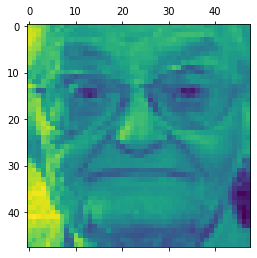

In [55]:
print("\033[1m" + "Age: " + "\033[0m", df['age'][1370], '\n',
      "\033[1m" + "Ethnicity: " + "\033[0m", df['ethnicity'][1370], '\n'
      "\033[1m" + "Gender: " + "\033[0m", df['gender'][1370], '\n', sep = "")
plt.matshow(X[1370][:,:,0])

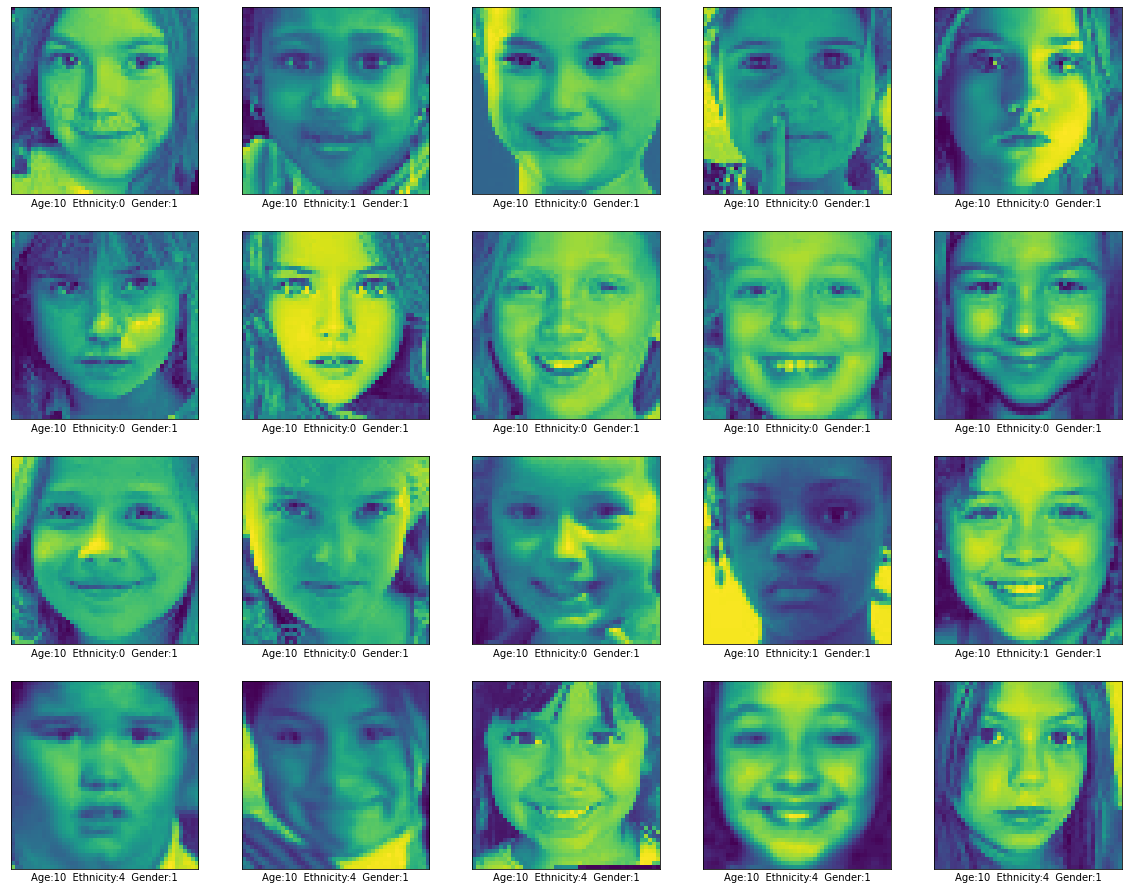

In [56]:
plt.figure(figsize=(20,20))
for i in range(1200, 1220):
    plt.subplot(5,5, (i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[i])+
        "  Gender:"+ str(df['gender'].iloc[i])
    )
plt.show()

In [57]:
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [58]:
df.columns

Index(['age', 'ethnicity', 'gender', 'pixels'], dtype='object')

Gender is our Dependent Variable and we need to split the data

In [59]:
y = df['gender']
y

0        0
1        0
2        0
3        0
4        0
        ..
23700    1
23701    1
23702    1
23703    1
23704    1
Name: gender, Length: 23705, dtype: int64

In [60]:
y.value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [61]:
X

array([[[[129.],
         [128.],
         [128.],
         ...,
         [118.],
         [ 99.],
         [ 53.]],

        [[130.],
         [129.],
         [128.],
         ...,
         [117.],
         [ 98.],
         [ 52.]],

        [[131.],
         [129.],
         [130.],
         ...,
         [114.],
         [ 97.],
         [ 50.]],

        ...,

        [[121.],
         [138.],
         [147.],
         ...,
         [151.],
         [150.],
         [148.]],

        [[117.],
         [137.],
         [146.],
         ...,
         [149.],
         [148.],
         [148.]],

        [[115.],
         [135.],
         [142.],
         ...,
         [146.],
         [146.],
         [146.]]],


       [[[164.],
         [ 74.],
         [111.],
         ...,
         [111.],
         [111.],
         [104.]],

        [[179.],
         [ 70.],
         [128.],
         ...,
         [112.],
         [113.],
         [108.]],

        [[176.],
         [ 71.],
      

In [62]:
# Normalized the Pixel column

X = X / 255.0
X

array([[[[0.5058824 ],
         [0.5019608 ],
         [0.5019608 ],
         ...,
         [0.4627451 ],
         [0.3882353 ],
         [0.20784314]],

        [[0.50980395],
         [0.5058824 ],
         [0.5019608 ],
         ...,
         [0.45882353],
         [0.38431373],
         [0.20392157]],

        [[0.5137255 ],
         [0.5058824 ],
         [0.50980395],
         ...,
         [0.44705883],
         [0.38039216],
         [0.19607843]],

        ...,

        [[0.4745098 ],
         [0.5411765 ],
         [0.5764706 ],
         ...,
         [0.5921569 ],
         [0.5882353 ],
         [0.5803922 ]],

        [[0.45882353],
         [0.5372549 ],
         [0.57254905],
         ...,
         [0.58431375],
         [0.5803922 ],
         [0.5803922 ]],

        [[0.4509804 ],
         [0.5294118 ],
         [0.5568628 ],
         ...,
         [0.57254905],
         [0.57254905],
         [0.57254905]]],


       [[[0.6431373 ],
         [0.2901961 ],
         [0.43

## **Gender Prediction Model**

**Splitting the dataset**

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state=42)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18489, 48, 48, 1), (5216, 48, 48, 1), (18489,), (5216,))

In [65]:
X_train

array([[[[0.34509805],
         [0.35686275],
         [0.3529412 ],
         ...,
         [0.59607846],
         [0.37254903],
         [0.09803922]],

        [[0.34901962],
         [0.36078432],
         [0.35686275],
         ...,
         [0.59607846],
         [0.38431373],
         [0.10588235]],

        [[0.36078432],
         [0.3647059 ],
         [0.3647059 ],
         ...,
         [0.61960787],
         [0.41960785],
         [0.13333334]],

        ...,

        [[0.3137255 ],
         [0.22352941],
         [0.18431373],
         ...,
         [0.28627452],
         [0.27058825],
         [0.1882353 ]],

        [[0.45882353],
         [0.37254903],
         [0.31764707],
         ...,
         [0.2784314 ],
         [0.26666668],
         [0.19215687]],

        [[0.53333336],
         [0.52156866],
         [0.46666667],
         ...,
         [0.2784314 ],
         [0.2784314 ],
         [0.19215687]]],


       [[[0.7137255 ],
         [0.61960787],
         [0.43

In [66]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import tensorflow.keras.layers as L

In [67]:
def binary_crossentropy(y_test, y_pred):
  """
  Calculuates Binary CrossEntropy between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

In [68]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Step-3: Compile the model
model_1.compile(optimizer='Adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Step-4: Fit the Model
history = model_1.fit(X_train, y_train, epochs=26, validation_split=0.1, batch_size=64)

Epoch 1/26
260/260 [==============================] - 34s 8ms/step - loss: 0.4550 - accuracy: 0.7834 - val_loss: 0.5590 - val_accuracy: 0.8518
Epoch 2/26
260/260 [==============================] - 2s 7ms/step - loss: 0.3314 - accuracy: 0.8498 - val_loss: 0.3165 - val_accuracy: 0.8778
Epoch 3/26
260/260 [==============================] - 2s 7ms/step - loss: 0.2949 - accuracy: 0.8675 - val_loss: 0.2837 - val_accuracy: 0.8734
Epoch 4/26
260/260 [==============================] - 2s 7ms/step - loss: 0.2711 - accuracy: 0.8769 - val_loss: 0.2438 - val_accuracy: 0.8891
Epoch 5/26
260/260 [==============================] - 2s 7ms/step - loss: 0.2557 - accuracy: 0.8841 - val_loss: 0.2796 - val_accuracy: 0.8875
Epoch 6/26
260/260 [==============================] - 2s 7ms/step - loss: 0.2419 - accuracy: 0.8902 - val_loss: 0.2375 - val_accuracy: 0.8935
Epoch 7/26
260/260 [==============================] - 2s 7ms/step - loss: 0.2248 - accuracy: 0.8974 - val_loss: 0.2502 - val_accuracy: 0.8983
Epoch

In [69]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

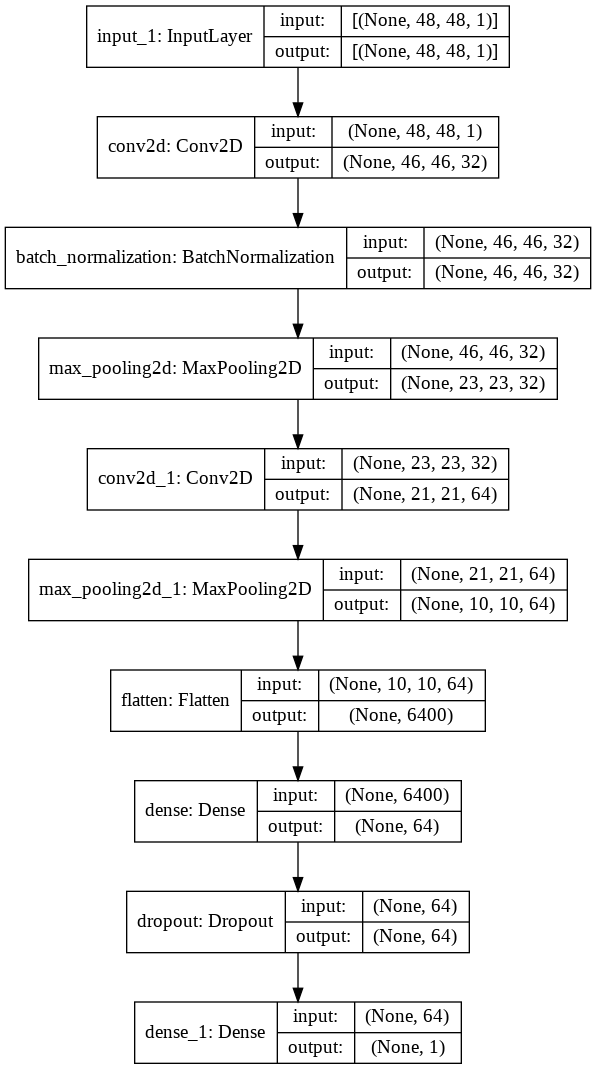

In [70]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes = True)

In [71]:
# Evaluate the model
model_1.evaluate(X_train, y_train)

578/578 [==============================] - 2s 3ms/step - loss: 0.1134 - accuracy: 0.9581


[0.11341782659292221, 0.9581372737884521]

Text(0.5, 1.0, 'Gender Training Prediction')

<Figure size 720x432 with 0 Axes>

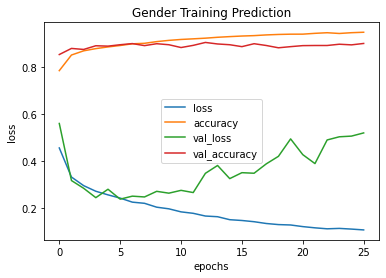

In [72]:
# Plot history (also known as a loss curve)
plt.figure(figsize = (10, 6))
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Gender Training Prediction")

In [73]:
loss_train, acc_train = model_1.evaluate(X_train,y_train)
print('Train loss: {}'.format(loss_train))
print('Train Accuracy: {}'.format(acc_train))
print()
loss_test, acc_test = model_1.evaluate(X_test,y_test)
print('Test loss: {}'.format(loss_test))
print('Test Accuracy: {}'.format(acc_test))

578/578 [==============================] - 2s 3ms/step - loss: 0.1134 - accuracy: 0.9581
Train loss: 0.11341782659292221
Train Accuracy: 0.9581372737884521

163/163 [==============================] - 1s 3ms/step - loss: 0.4559 - accuracy: 0.8965
Test loss: 0.45587190985679626
Test Accuracy: 0.8964723944664001


In [74]:
# Prediction on TEST Data
y_pred_1 = model_1.predict(X_test)

In [75]:
binary_cross_entropy_1 = binary_crossentropy(y_test, y_pred_1.squeeze()).numpy()
binary_cross_entropy_1

0.11209758

* Based on the accuracy and loss we can see that the model is overfitting i.e. Performing well on the training dataset and not so good on Testing dataset.
* Let's run the similar model but now instead of 26epoch we will take 20 epoch and see if the model is overfitting or underfitting

In [76]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Step-3: Compile the model
model_2.compile(optimizer='Adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Step-4: Fit the Model
history_1 = model_2.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=64)

Epoch 1/20
260/260 [==============================] - 2s 7ms/step - loss: 0.4527 - accuracy: 0.7852 - val_loss: 0.5611 - val_accuracy: 0.8643
Epoch 2/20
260/260 [==============================] - 2s 7ms/step - loss: 0.3296 - accuracy: 0.8491 - val_loss: 0.3422 - val_accuracy: 0.8680
Epoch 3/20
260/260 [==============================] - 2s 7ms/step - loss: 0.2910 - accuracy: 0.8686 - val_loss: 0.2813 - val_accuracy: 0.8724
Epoch 4/20
260/260 [==============================] - 2s 7ms/step - loss: 0.2697 - accuracy: 0.8776 - val_loss: 0.2443 - val_accuracy: 0.8859
Epoch 5/20
260/260 [==============================] - 2s 7ms/step - loss: 0.2538 - accuracy: 0.8850 - val_loss: 0.2408 - val_accuracy: 0.8940
Epoch 6/20
260/260 [==============================] - 2s 7ms/step - loss: 0.2359 - accuracy: 0.8941 - val_loss: 0.2491 - val_accuracy: 0.8908
Epoch 7/20
260/260 [==============================] - 2s 7ms/step - loss: 0.2260 - accuracy: 0.8990 - val_loss: 0.2829 - val_accuracy: 0.8908
Epoch 

In [77]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

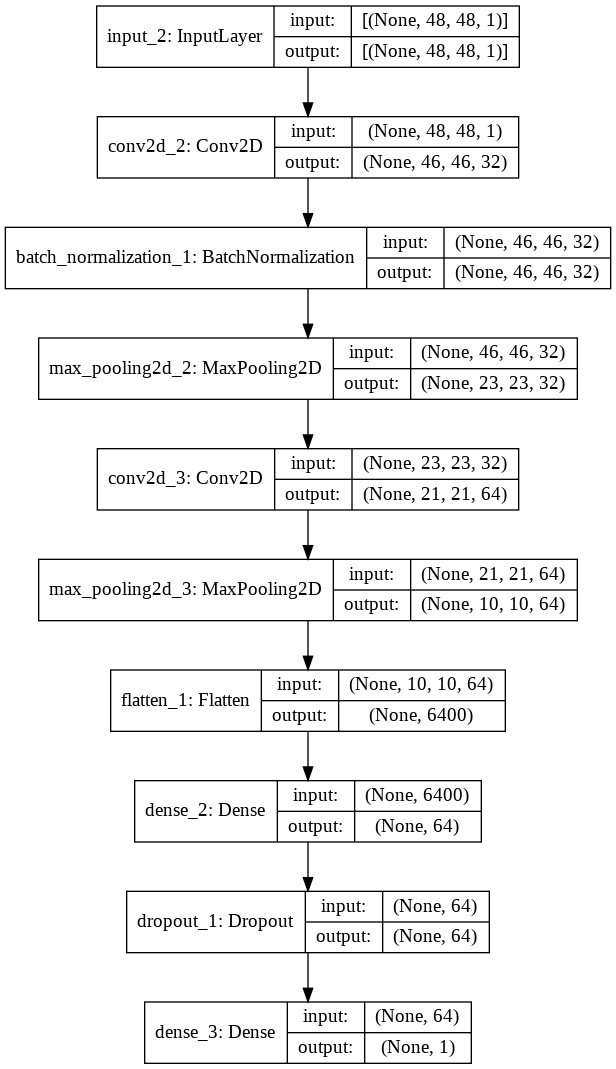

In [78]:
plot_model(model_2, show_shapes = True)

Text(0.5, 1.0, 'Gender Training Prediction')

<Figure size 720x432 with 0 Axes>

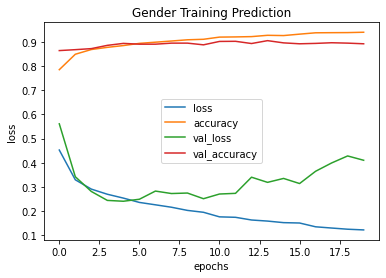

In [79]:
# Plot history (also known as a loss curve)
plt.figure(figsize = (10, 6))
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Gender Training Prediction")

In [80]:
loss_train_1, acc_train_1 = model_2.evaluate(X_train,y_train)
print('Train loss: {}'.format(loss_train_1))
print('Train Accuracy: {}'.format(acc_train_1))
print()

loss_test_1, acc_test_1 = model_2.evaluate(X_test,y_test)
print('Test loss: {}'.format(loss_test_1))
print('Test Accuracy: {}'.format(acc_test_1))

578/578 [==============================] - 2s 3ms/step - loss: 0.1334 - accuracy: 0.9450
Train loss: 0.13339351117610931
Train Accuracy: 0.944994330406189

163/163 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8959
Test loss: 0.32955965399742126
Test Accuracy: 0.8958972096443176


In [81]:
# Prediction on TEST Data
y_pred_2 = model_2.predict(X_test)

binary_cross_entropy_2 = binary_crossentropy(y_test, y_pred_2.squeeze()).numpy()
binary_cross_entropy_2

0.117691465

* For Epoch = 20 model is still Overfiiting let's try to change the Optimizer and keep epoch = 20

In [82]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Step-3: Compile the model
model_3.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Step-4: Fit the Model
history_2 = model_3.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=64)

Epoch 1/20
260/260 [==============================] - 2s 7ms/step - loss: 0.5307 - accuracy: 0.7350 - val_loss: 0.5910 - val_accuracy: 0.8085
Epoch 2/20
260/260 [==============================] - 2s 7ms/step - loss: 0.4060 - accuracy: 0.8167 - val_loss: 0.4061 - val_accuracy: 0.8556
Epoch 3/20
260/260 [==============================] - 2s 7ms/step - loss: 0.3606 - accuracy: 0.8404 - val_loss: 0.3180 - val_accuracy: 0.8610
Epoch 4/20
260/260 [==============================] - 2s 7ms/step - loss: 0.3343 - accuracy: 0.8526 - val_loss: 0.3001 - val_accuracy: 0.8691
Epoch 5/20
260/260 [==============================] - 2s 7ms/step - loss: 0.3149 - accuracy: 0.8593 - val_loss: 0.2906 - val_accuracy: 0.8745
Epoch 6/20
260/260 [==============================] - 2s 7ms/step - loss: 0.3057 - accuracy: 0.8655 - val_loss: 0.2780 - val_accuracy: 0.8778
Epoch 7/20
260/260 [==============================] - 2s 7ms/step - loss: 0.2915 - accuracy: 0.8724 - val_loss: 0.2793 - val_accuracy: 0.8697
Epoch 

In [83]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

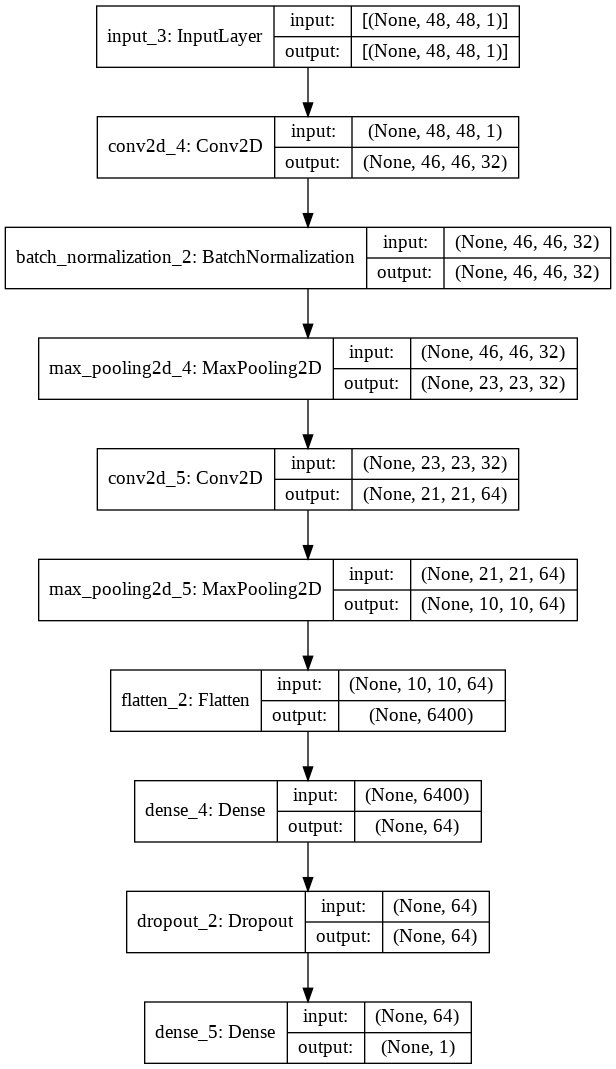

In [84]:
plot_model(model_3, show_shapes = True)

Text(0.5, 1.0, 'Gender Training Prediction')

<Figure size 720x432 with 0 Axes>

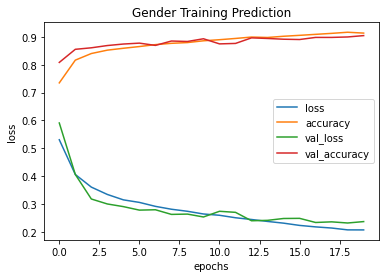

In [85]:
# Plot history (also known as a loss curve)
plt.figure(figsize = (10, 6))
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Gender Training Prediction")

In [86]:
loss_train_2, acc_train_2 = model_3.evaluate(X_train,y_train)
print('Train loss: {}'.format(loss_train_2))
print('Train Accuracy: {}'.format(acc_train_2))
print()

loss_test_2, acc_test_2 = model_3.evaluate(X_test,y_test)
print('Test loss: {}'.format(loss_test_2))
print('Test Accuracy: {}'.format(acc_test_2))

578/578 [==============================] - 2s 3ms/step - loss: 0.1922 - accuracy: 0.9355
Train loss: 0.192195326089859
Train Accuracy: 0.9354751706123352

163/163 [==============================] - 1s 3ms/step - loss: 0.2488 - accuracy: 0.8957
Test loss: 0.24875706434249878
Test Accuracy: 0.89570552110672


In [87]:
# Prediction on TEST Data
y_pred_3 = model_3.predict(X_test)

binary_cross_entropy_3 = binary_crossentropy(y_test, y_pred_3.squeeze()).numpy()
binary_cross_entropy_3

0.15968473

* Let's run the Model with Optimizer = SGD and epoch = 10

In [88]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Step-3: Compile the model
model_4.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Step-4: Fit the Model
history_3 = model_4.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=64)

Epoch 1/10
260/260 [==============================] - 2s 7ms/step - loss: 0.5300 - accuracy: 0.7351 - val_loss: 0.5918 - val_accuracy: 0.8150
Epoch 2/10
260/260 [==============================] - 2s 7ms/step - loss: 0.4052 - accuracy: 0.8185 - val_loss: 0.4063 - val_accuracy: 0.8529
Epoch 3/10
260/260 [==============================] - 2s 7ms/step - loss: 0.3595 - accuracy: 0.8391 - val_loss: 0.3234 - val_accuracy: 0.8551
Epoch 4/10
260/260 [==============================] - 2s 7ms/step - loss: 0.3341 - accuracy: 0.8505 - val_loss: 0.3086 - val_accuracy: 0.8675
Epoch 5/10
260/260 [==============================] - 2s 7ms/step - loss: 0.3149 - accuracy: 0.8620 - val_loss: 0.2875 - val_accuracy: 0.8724
Epoch 6/10
260/260 [==============================] - 2s 7ms/step - loss: 0.3058 - accuracy: 0.8671 - val_loss: 0.2784 - val_accuracy: 0.8761
Epoch 7/10
260/260 [==============================] - 2s 7ms/step - loss: 0.2895 - accuracy: 0.8742 - val_loss: 0.2787 - val_accuracy: 0.8772
Epoch 

In [89]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

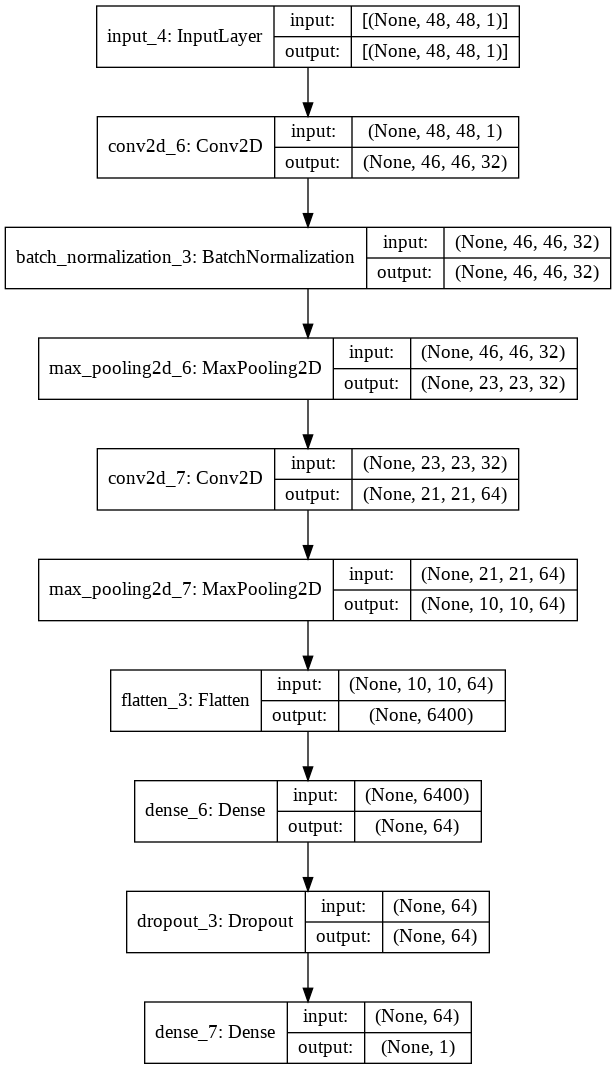

In [90]:
plot_model(model_4, show_shapes = True)

Text(0.5, 1.0, 'Gender Training Prediction')

<Figure size 720x432 with 0 Axes>

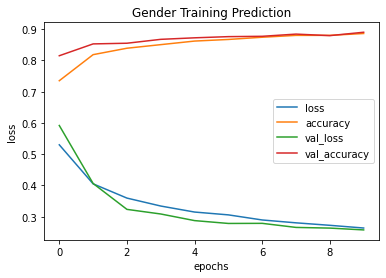

In [91]:
# Plot history (also known as a loss curve)
plt.figure(figsize = (10, 6))
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Gender Training Prediction")

In [92]:
loss_train_3, acc_train_3 = model_4.evaluate(X_train,y_train)
print('Train loss: {}'.format(loss_train_3))
print('Train Accuracy: {}'.format(acc_train_3))
print()

loss_test_3, acc_test_3 = model_4.evaluate(X_test,y_test)
print('Test loss: {}'.format(loss_test_3))
print('Test Accuracy: {}'.format(acc_test_3))

578/578 [==============================] - 2s 3ms/step - loss: 0.2384 - accuracy: 0.9041
Train loss: 0.23842217028141022
Train Accuracy: 0.9041051268577576

163/163 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.8855
Test loss: 0.265532523393631
Test Accuracy: 0.88554447889328


In [93]:
# Prediction on TEST Data
y_pred_4 = model_4.predict(X_test)

binary_cross_entropy_4 = binary_crossentropy(y_test, y_pred_4.squeeze()).numpy()
binary_cross_entropy_4

0.17346033

In [94]:
model_result =  [["model_1", loss_train, loss_test, acc_train, acc_test, binary_cross_entropy_1],
                 ["model_2", loss_train_1, loss_test_1, acc_train_1, acc_test_1, binary_cross_entropy_2],
                 ["model_3", loss_train_2, loss_test_2, acc_train_2, acc_test_2, binary_cross_entropy_3],
                 ["model_4", loss_train_3, loss_test_3, acc_train_3, acc_test_3, binary_cross_entropy_4]]
final_result = pd.DataFrame(model_result, columns=["Model", "Loss", "Test Loss", "Accuracy", "Test Accuracy", "Binary_Cross_Entropy"])
final_result                 

,Model,Loss,Test Loss,Accuracy,Test Accuracy,Binary_Cross_Entropy
0,model_1,0.113418,0.455872,0.958137,0.896472,0.112098
1,model_2,0.133394,0.329560,0.944994,0.895897,0.117691
2,model_3,0.192195,0.248757,0.935475,0.895706,0.159685
3,model_4,0.238422,0.265533,0.904105,0.885544,0.173460


### **Overview of the Model**<br>
* **Model_1 ==> Optimizer = Adam, Epoch = 26**
    * Accuracy for Model_1 is high but if we compare loss and Accuracy then there is high chance of Overfitting. Binary Cross entropy which loss value for the model is also too low.
* **Model_2 ==> Optimizer = Adam, Epoch = 20**
    * Accuracy for Model_2 is lower than Model_1 but if we compare loss and Accuracy then there is high chance of Overfitting. Binary Cross entropy which loss value for the model is showing good value.
* **Model_3 ==> Optimizer = SGD, Epoch = 20**
    * Accuracy for Model_3 is lower than Model_2 but if we compare loss and Accuracy then there is high chance of Overfitting. Binary Cross entropy which loss value for the model is also too low.
* **Model_4 ==> Optimizer = SGD, Epoch = 10**
    * Accuracy for Model_4 is lower than Model_3 but if we compare loss and Accuracy then there is high chance of Overfitting. Binary Cross entropy which loss value for the model is also too low.

### **Changing the Structure of our model by adding more Convolution Layer, Dropout layer**

In [95]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(48,48,1)),                       
        tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', 
                 activation ='relu', input_shape = (32, 32, 3)),
        tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3),padding = 'Same', 
                 activation ='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu'),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu'),
        tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation = "sigmoid")])  # Since it's binary data we will use Sigmoid instead of Softmax
# Step-3: Compile the model
model_5.compile(optimizer='Adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Step-4: Fit the Model
history_4 = model_5.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=64)

Epoch 1/20
260/260 [==============================] - 4s 12ms/step - loss: 0.5845 - accuracy: 0.6684 - val_loss: 0.6014 - val_accuracy: 0.8004
Epoch 2/20
260/260 [==============================] - 3s 11ms/step - loss: 0.4411 - accuracy: 0.7783 - val_loss: 0.3697 - val_accuracy: 0.8734
Epoch 3/20
260/260 [==============================] - 3s 11ms/step - loss: 0.4023 - accuracy: 0.7942 - val_loss: 0.3198 - val_accuracy: 0.8713
Epoch 4/20
260/260 [==============================] - 3s 11ms/step - loss: 0.3794 - accuracy: 0.8059 - val_loss: 0.2738 - val_accuracy: 0.8707
Epoch 5/20
260/260 [==============================] - 3s 11ms/step - loss: 0.3648 - accuracy: 0.8129 - val_loss: 0.3002 - val_accuracy: 0.8529
Epoch 6/20
260/260 [==============================] - 3s 11ms/step - loss: 0.3495 - accuracy: 0.8172 - val_loss: 0.2515 - val_accuracy: 0.8880
Epoch 7/20
260/260 [==============================] - 3s 11ms/step - loss: 0.3480 - accuracy: 0.8214 - val_loss: 0.2590 - val_accuracy: 0.8870

In [96]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)       

Text(0.5, 1.0, 'Gender Training Prediction')

<Figure size 720x432 with 0 Axes>

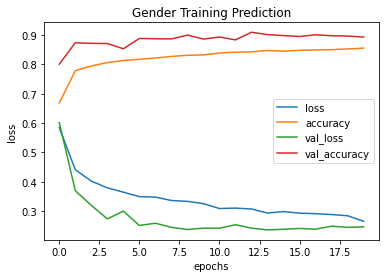

In [97]:
# Plot history (also known as a loss curve)
plt.figure(figsize = (10, 6))
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Gender Training Prediction")

In [98]:
loss_train_4, acc_train_4 = model_5.evaluate(X_train,y_train)
print('Train loss: {}'.format(loss_train_4))
print('Train Accuracy: {}'.format(acc_train_4))
print()

loss_test_4, acc_test_4 = model_5.evaluate(X_test,y_test)
print('Test loss: {}'.format(loss_test_4))
print('Test Accuracy: {}'.format(acc_test_4))

578/578 [==============================] - 2s 3ms/step - loss: 0.1635 - accuracy: 0.9196
Train loss: 0.16345156729221344
Train Accuracy: 0.9196279048919678

163/163 [==============================] - 1s 3ms/step - loss: 0.2420 - accuracy: 0.8896
Test loss: 0.24195176362991333
Test Accuracy: 0.8895705342292786


In [99]:
# Prediction on TEST Data
y_pred_5 = model_5.predict(X_test)

binary_cross_entropy_5 = binary_crossentropy(y_test, y_pred_5.squeeze()).numpy()
binary_cross_entropy_5

0.1322974

Model_5 with Optimizer = "SGD"

In [100]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(48,48,1)),                       
        tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', 
                 activation ='relu', input_shape = (32, 32, 3)),
        tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3),padding = 'Same', 
                 activation ='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu'),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu'),
        tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation = "sigmoid")])  # Since it's binary data we will use Sigmoid instead of Softmax
# Step-3: Compile the model
model_6.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Step-4: Fit the Model
history_5 = model_6.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=64, verbose = 0)

In [101]:
model_6.evaluate(X_train, y_train)

578/578 [==============================] - 2s 3ms/step - loss: 0.2396 - accuracy: 0.9042


[0.23957668244838715, 0.9041592478752136]

In [102]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)       

Text(0.5, 1.0, 'Gender Training Prediction')

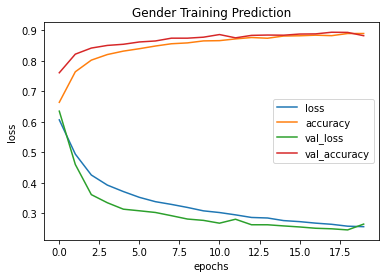

In [103]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Gender Training Prediction")

In [104]:
loss_train_5, acc_train_5 = model_6.evaluate(X_train,y_train)
print('Train loss: {}'.format(loss_train_5))
print('Train Accuracy: {}'.format(acc_train_5))
print()

loss_test_5, acc_test_5 = model_6.evaluate(X_test,y_test)
print('Test loss: {}'.format(loss_test_5))
print('Test Accuracy: {}'.format(acc_test_5))

578/578 [==============================] - 2s 3ms/step - loss: 0.2396 - accuracy: 0.9042
Train loss: 0.23957668244838715
Train Accuracy: 0.9041592478752136

163/163 [==============================] - 1s 3ms/step - loss: 0.2640 - accuracy: 0.8900
Test loss: 0.2639678418636322
Test Accuracy: 0.8899539709091187


In [105]:
# Prediction on TEST Data
y_pred_6 = model_6.predict(X_test)

binary_cross_entropy_6 = binary_crossentropy(y_test, y_pred_6.squeeze()).numpy()
binary_cross_entropy_6

0.17650324

In [106]:
model_result =  [["model_1", loss_train, loss_test, acc_train, acc_test, binary_cross_entropy_1],
                 ["model_2", loss_train_1, loss_test_1, acc_train_1, acc_test_1, binary_cross_entropy_2],
                 ["model_3", loss_train_2, loss_test_2, acc_train_2, acc_test_2, binary_cross_entropy_3],
                 ["model_4", loss_train_3, loss_test_3, acc_train_3, acc_test_3, binary_cross_entropy_4],
                 ["model_5", loss_train_4, loss_test_4, acc_train_4, acc_test_4, binary_cross_entropy_5],
                 ["model_6", loss_train_5, loss_test_5, acc_train_5, acc_test_5, binary_cross_entropy_6]]
final_result_gender = pd.DataFrame(model_result, columns=["Model", "Loss", "Test Loss", "Accuracy", "Test Accuracy", "Binary_Cross_Entropy"])
final_result_gender                 

,Model,Loss,Test Loss,Accuracy,Test Accuracy,Binary_Cross_Entropy
0,model_1,0.113418,0.455872,0.958137,0.896472,0.112098
1,model_2,0.133394,0.329560,0.944994,0.895897,0.117691
2,model_3,0.192195,0.248757,0.935475,0.895706,0.159685
3,model_4,0.238422,0.265533,0.904105,0.885544,0.173460
4,model_5,0.163452,0.241952,0.919628,0.889571,0.132297
5,model_6,0.239577,0.263968,0.904159,0.889954,0.176503


**Model_6 --> Optimizer = SGD, Epoch = 20, Activation Function(Final Layer) = Sigmoid) is doing better job as compared to others**

**Data Augmentation**

In [107]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False,    
    
    # set each sample mean to 0
    samplewise_center=False,      
    
    # randomly rotate images in the range (degrees, 0 to 180)
    # rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
    rotation_range=40,        
    
    # width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly
    # translate pictures vertically or horizontally
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.2,    
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.2, 
    
    
    # rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB 
    # coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), 
    # so we target values between 0 and 1 instead by scaling with a 1/255. factor.
    
    rescale=1./255,
    
    # shear_range is for randomly applying shearing transformations
    shear_range=0.2,    
    
    # Randomly zoom image i.e. zoom_range is for randomly zooming inside pictures
    zoom_range=0.2,    
    
    # randomly flip images horizontally
    # horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no 
    # assumptions of horizontal assymetry (e.g. real-world pictures).
    
    horizontal_flip=False,    
    # randomly flip images vertically
    vertical_flip=False,  # randomly flip images   
    
    # apply ZCA whitening
    zca_whitening=False,  # apply ZCA whitening
    
    # fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
    fill_mode='nearest')

In [108]:
datagen.fit(X_train)

In [109]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [110]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(48,48,1)),                       
        tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', 
                 activation ='relu', input_shape = (32, 32, 3)),
        tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3),padding = 'Same', 
                 activation ='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu'),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu'),
        tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation = "sigmoid")])  # Since it's binary data we will use Sigmoid instead of Softmax

# Step-3: Compile the model
model_7.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [111]:
batch_size = 64
history_6 = model_7.fit(datagen.flow(X_train,y_train, batch_size = batch_size),
                              epochs = 20, steps_per_epoch = X_train.shape[0] // batch_size, callbacks=[learning_rate_reduction], verbose = 0)


Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.

Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.


In [112]:
model_7.evaluate(X_train, y_train)

578/578 [==============================] - 2s 3ms/step - loss: 1.1132 - accuracy: 0.4770


[1.1131988763809204, 0.4770404100418091]

In [113]:
final_result_gender

,Model,Loss,Test Loss,Accuracy,Test Accuracy,Binary_Cross_Entropy
0,model_1,0.113418,0.455872,0.958137,0.896472,0.112098
1,model_2,0.133394,0.329560,0.944994,0.895897,0.117691
2,model_3,0.192195,0.248757,0.935475,0.895706,0.159685
3,model_4,0.238422,0.265533,0.904105,0.885544,0.173460
4,model_5,0.163452,0.241952,0.919628,0.889571,0.132297
5,model_6,0.239577,0.263968,0.904159,0.889954,0.176503


**Performing Data Augmentation is not generating a good model and hence we will ignore or not use this model**

## **Ethinicity Model Prediction**

In [114]:
y = df['ethnicity']

In [115]:
y.value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18489, 48, 48, 1), (5216, 48, 48, 1), (18489,), (5216,))

**Model_8 --> -->**

In [117]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(5)
])
# Step-3: Compile the model
model_8.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # False because we are using Softmax
              metrics=['accuracy'])

# Step-4: Fit the Model
history_7 = model_8.fit(X_train, y_train, epochs=26, validation_split=0.1, batch_size=64, verbose = 0)

In [118]:
model_8.evaluate(X_train, y_train)

578/578 [==============================] - 2s 3ms/step - loss: 0.5548 - accuracy: 0.8424


[0.5547766089439392, 0.8424468636512756]

In [119]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

Text(0.5, 1.0, 'Gender Training Prediction')

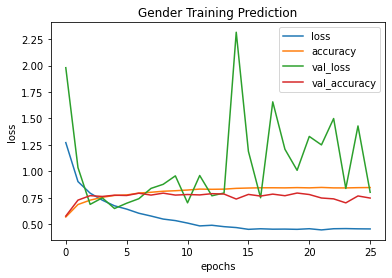

In [120]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_7.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Gender Training Prediction")

In [121]:
loss_train_7, acc_train_7 = model_8.evaluate(X_train,y_train)
print('Train loss: {}'.format(loss_train_7))
print('Train Accuracy: {}'.format(acc_train_7))
print()
loss_test_7, acc_test_7 = model_8.evaluate(X_test,y_test)
print('Test loss: {}'.format(loss_test_7))
print('Test Accuracy: {}'.format(acc_test_7))

578/578 [==============================] - 2s 3ms/step - loss: 0.5548 - accuracy: 0.8424
Train loss: 0.5547766089439392
Train Accuracy: 0.8424468636512756

163/163 [==============================] - 1s 3ms/step - loss: 0.7794 - accuracy: 0.7454
Test loss: 0.7794391512870789
Test Accuracy: 0.745398759841919


In [122]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(5)
])
# Step-3: Compile the model
model_9.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # False because we are using Softmax
              metrics=['accuracy'])

# Step-4: Fit the Model
history_8 = model_9.fit(X_train, y_train, epochs=26, validation_split=0.1, batch_size=64, verbose = 0)

In [123]:
model_9.evaluate(X_train, y_train)

578/578 [==============================] - 2s 3ms/step - loss: 0.3140 - accuracy: 0.9022


[0.31403425335884094, 0.9022121429443359]

In [124]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                409664    
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)               

Text(0.5, 1.0, 'Gender Training Prediction')

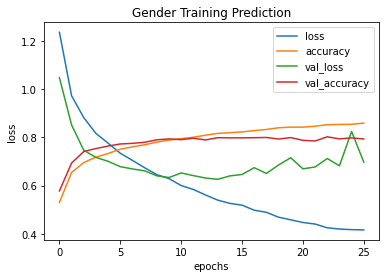

In [125]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_8.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Gender Training Prediction")

In [126]:
loss_train_8, acc_train_8 = model_9.evaluate(X_train,y_train)
print('Train loss: {}'.format(loss_train_8))
print('Train Accuracy: {}'.format(acc_train_8))
print()
loss_test_8, acc_test_8 = model_9.evaluate(X_test,y_test)
print('Test loss: {}'.format(loss_test_8))
print('Test Accuracy: {}'.format(acc_test_8))

578/578 [==============================] - 2s 3ms/step - loss: 0.3140 - accuracy: 0.9022
Train loss: 0.31403425335884094
Train Accuracy: 0.9022121429443359

163/163 [==============================] - 1s 3ms/step - loss: 0.6753 - accuracy: 0.7882
Test loss: 0.6752893328666687
Test Accuracy: 0.7881518602371216


In [163]:
print("\033[1m" + "Ethinicity Summary model" + "\033[0m")
print()
model_result_ethinicity =  [["model_8", loss_train_7, loss_test_7, acc_train_7, acc_test_7],
                            ["model_9", loss_train_8, loss_test_8, acc_train_8, acc_test_8]]
final_result_ethinicity = pd.DataFrame(model_result_ethinicity, columns=["Model", "Loss", "Test Loss", "Accuracy", "Test Accuracy"])
final_result_ethinicity                 


Ethinicity Summary model



,Model,Loss,Test Loss,Accuracy,Test Accuracy
0,model_8,0.554777,0.779439,0.842447,0.745399
1,model_9,0.314034,0.675289,0.902212,0.788152


## **Age Model Prediction**

In [127]:
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [128]:
df['age'].min(), df['age'].max()

(1, 116)

In [129]:
len(df['age'].value_counts())

104

There are total of 104 Discrete unique values defined in the dataset. We can either run our model on this or simply performing Bining and convert this 104unique values into few categorical values. 

In [130]:
age_bin = df['age']
age_bin

0         1
1         1
2         1
3         1
4         1
         ..
23700    99
23701    99
23702    99
23703    99
23704    99
Name: age, Length: 23705, dtype: int64

In [131]:
age_bin = pd.qcut(age_bin, q=4, labels=[0, 1, 2, 3])
age_bin

0        0
1        0
2        0
3        0
4        0
        ..
23700    3
23701    3
23702    3
23703    3
23704    3
Name: age, Length: 23705, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [132]:
age_bin.value_counts()

2    6157
0    6044
1    5893
3    5611
Name: age, dtype: int64

In [133]:
y = df['age']
y_bin = age_bin

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18489, 48, 48, 1), (5216, 48, 48, 1), (18489,), (5216,))

In [135]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size = 0.22, random_state=42)
X_train_bin.shape, X_test_bin.shape, y_train_bin.shape, y_test_bin.shape

((18489, 48, 48, 1), (5216, 48, 48, 1), (18489,), (5216,))

In [150]:
# Model building on Y(not Bin)

# Set random seed
tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation = 'relu')
])
# Step-3: Compile the model
model_10.compile(optimizer='adam',
              loss='mean_squared_error', 
              metrics=['mae'])

# Step-4: Fit the Model
history_9 = model_10.fit(X_train, y_train, epochs=17, validation_split=0.1, batch_size=64)

Epoch 1/17
260/260 [==============================] - 2s 7ms/step - loss: 455.9209 - mae: 16.4660 - val_loss: 344.8752 - val_mae: 13.6373
Epoch 2/17
260/260 [==============================] - 2s 6ms/step - loss: 300.1673 - mae: 13.3205 - val_loss: 226.9849 - val_mae: 11.7185
Epoch 3/17
260/260 [==============================] - 2s 6ms/step - loss: 274.5408 - mae: 12.6571 - val_loss: 214.5877 - val_mae: 11.0947
Epoch 4/17
260/260 [==============================] - 2s 6ms/step - loss: 261.3561 - mae: 12.2537 - val_loss: 203.4687 - val_mae: 10.9280
Epoch 5/17
260/260 [==============================] - 2s 6ms/step - loss: 249.6091 - mae: 12.0320 - val_loss: 239.7410 - val_mae: 12.3547
Epoch 6/17
260/260 [==============================] - 2s 6ms/step - loss: 243.0365 - mae: 11.8122 - val_loss: 185.0109 - val_mae: 10.1628
Epoch 7/17
260/260 [==============================] - 2s 6ms/step - loss: 227.9803 - mae: 11.4387 - val_loss: 201.6894 - val_mae: 10.5119
Epoch 8/17
260/260 [==============

In [151]:
model_10.evaluate(X_train, y_train)

578/578 [==============================] - 2s 3ms/step - loss: 115.9250 - mae: 8.0639


[115.925048828125, 8.063920021057129]

In [152]:
model_10.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                409664    
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)              

Text(0.5, 1.0, 'Gender Training Prediction')

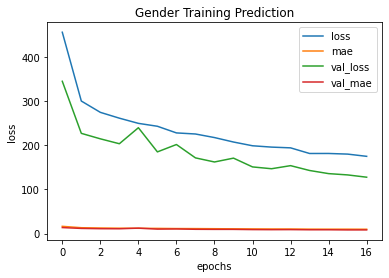

In [153]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_9.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Gender Training Prediction")

In [154]:
loss_train_9, acc_train_9 = model_10.evaluate(X_train,y_train)
print('Train loss: {}'.format(loss_train_9))
print('Train Accuracy: {}'.format(acc_train_9))
print()
loss_test_9, acc_test_9 = model_10.evaluate(X_test,y_test)
print('Test loss: {}'.format(loss_test_9))
print('Test Accuracy: {}'.format(acc_test_9))

578/578 [==============================] - 2s 3ms/step - loss: 115.9250 - mae: 8.0639
Train loss: 115.925048828125
Train Accuracy: 8.063920021057129

163/163 [==============================] - 1s 3ms/step - loss: 124.0716 - mae: 8.2768
Test loss: 124.07159423828125
Test Accuracy: 8.27676010131836


In [155]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(5)
])
# Step-3: Compile the model
model_11.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # False because we are using Softmax
              metrics=['accuracy'])

# Step-4: Fit the Model
history_10 = model_11.fit(X_train_bin, y_train_bin, epochs=26, validation_split=0.1, batch_size=64)

Epoch 1/26
260/260 [==============================] - 2s 7ms/step - loss: 1.2474 - accuracy: 0.4313 - val_loss: 1.0465 - val_accuracy: 0.5327
Epoch 2/26
260/260 [==============================] - 2s 6ms/step - loss: 1.0616 - accuracy: 0.5308 - val_loss: 0.9520 - val_accuracy: 0.5873
Epoch 3/26
260/260 [==============================] - 2s 6ms/step - loss: 0.9810 - accuracy: 0.5641 - val_loss: 0.9803 - val_accuracy: 0.5657
Epoch 4/26
260/260 [==============================] - 2s 6ms/step - loss: 0.9314 - accuracy: 0.5842 - val_loss: 0.8727 - val_accuracy: 0.6198
Epoch 5/26
260/260 [==============================] - 2s 7ms/step - loss: 0.8996 - accuracy: 0.6020 - val_loss: 0.8847 - val_accuracy: 0.6079
Epoch 6/26
260/260 [==============================] - 2s 6ms/step - loss: 0.8699 - accuracy: 0.6120 - val_loss: 0.8191 - val_accuracy: 0.6479
Epoch 7/26
260/260 [==============================] - 2s 6ms/step - loss: 0.8444 - accuracy: 0.6240 - val_loss: 0.8492 - val_accuracy: 0.6333
Epoch 

In [156]:
model_11.evaluate(X_train_bin, y_train_bin)

578/578 [==============================] - 2s 3ms/step - loss: 0.5425 - accuracy: 0.7727


[0.5424931645393372, 0.772729754447937]

In [157]:
model_11.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                409664    
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)              

Text(0.5, 1.0, 'Gender Training Prediction')

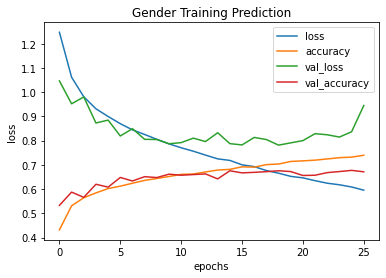

In [158]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_10.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Gender Training Prediction")

In [160]:
loss_train_10, acc_train_10 = model_11.evaluate(X_train_bin,y_train_bin)
print('Train loss: {}'.format(loss_train_10))
print('Train Accuracy: {}'.format(acc_train_10))
print()
loss_test_10, acc_test_10 = model_11.evaluate(X_test_bin,y_test_bin)
print('Test loss: {}'.format(loss_test_10))
print('Test Accuracy: {}'.format(acc_test_10))

578/578 [==============================] - 2s 3ms/step - loss: 0.5425 - accuracy: 0.7727
Train loss: 0.5424931645393372
Train Accuracy: 0.772729754447937

163/163 [==============================] - 1s 3ms/step - loss: 0.9352 - accuracy: 0.6413
Test loss: 0.9352017045021057
Test Accuracy: 0.6412960290908813


In [164]:
print("\033[1m" + "Age Summary model" + "\033[0m")
print()
model_result_age =  [["model_10", loss_train_9, loss_test_9, acc_train_9, acc_test_9],
                            ["model_11", loss_train_10, loss_test_10, acc_train_10, acc_test_10]]
final_result_age = pd.DataFrame(model_result_age, columns=["Model", "Loss", "Test Loss", "Accuracy", "Test Accuracy"])
final_result_age                 


Age Summary model



,Model,Loss,Test Loss,Accuracy,Test Accuracy
0,model_10,115.925049,124.071594,8.06392,8.276760
1,model_11,0.542493,0.935202,0.77273,0.641296


In [174]:
print('\033[1m' + "GENDER MODEL PREDICTION" + '\033[0m')
print()
print('\033[1m' + "Model_1 Description --> --> " + "\033[0m")
print("Optimizer Function = Adam", '\n',
      "Loss Function = BinaryCrossentropy",'\n',
      "Epoch = 26", '\n',
      "Train_Loss Value: ", round(loss_train, 4), '\n',
      "Test_Loss Value: ", round(loss_train, 4), '\n',
      "Train_Accuracy Value: ", round(acc_train, 4), '\n',
      "Test_Accuracy Value: ", round(acc_test, 4), '\n', 
      "Binary Cross Entropy for TEST Data: ", round(binary_cross_entropy_1, 4), sep = "")
print()
print('\033[1m' + "Model_2 Description --> --> " + "\033[0m")
print("Optimizer Function = Adam", '\n',
      "Loss Function = BinaryCrossentropy",'\n',
      "Epoch = 20", '\n',
      "Train_Loss Value: ", round(loss_train_1, 4), '\n',
      "Test_Loss Value: ", round(loss_train_1, 4), '\n',
      "Train_Accuracy Value: ", round(acc_train_1, 4), '\n',
      "Test_Accuracy Value: ", round(acc_test_1, 4), '\n', 
      "Binary Cross Entropy for TEST Data: ", round(binary_cross_entropy_2, 4), sep = "")
print()
print('\033[1m' + "Model_3 Description --> --> " + "\033[0m")
print("Optimizer Function = SGD", '\n',
      "Loss Function = BinaryCrossentropy",'\n',
      "Epoch = 20", '\n',
      "Train_Loss Value: ", round(loss_train_2, 4), '\n',
      "Test_Loss Value: ", round(loss_train_2, 4), '\n',
      "Train_Accuracy Value: ", round(acc_train_2, 4), '\n',
      "Test_Accuracy Value: ", round(acc_test_2, 4), '\n', 
      "Binary Cross Entropy for TEST Data: ", round(binary_cross_entropy_3, 4), sep = "")
print()
print('\033[1m' + "Model_4 Description --> --> " + "\033[0m")
print("Optimizer Function = SGD", '\n',
      "Loss Function = BinaryCrossentropy",'\n',
      "Epoch = 10", '\n',
      "Train_Loss Value: ", round(loss_train_3, 4), '\n',
      "Test_Loss Value: ", round(loss_train_3, 4), '\n',
      "Train_Accuracy Value: ", round(acc_train_3, 4), '\n',
      "Test_Accuracy Value: ", round(acc_test_3, 4), '\n', 
      "Binary Cross Entropy for TEST Data: ", round(binary_cross_entropy_4, 4), sep = "")
print()
print('\033[1m' + "Model_5 Description --> --> " + "\033[0m")
print("Optimizer Function = Adam", '\n',
      "Loss Function = BinaryCrossentropy",'\n',
      "Epoch = 20", '\n',
      "Train_Loss Value: ", round(loss_train_4, 4), '\n',
      "Test_Loss Value: ", round(loss_train_4, 4), '\n',
      "Train_Accuracy Value: ", round(acc_train_4, 4), '\n',
      "Test_Accuracy Value: ", round(acc_test_4, 4), '\n', 
      "Binary Cross Entropy for TEST Data: ", round(binary_cross_entropy_5, 4), sep = "")
print()
print('\033[1m' + "Model_6 Description --> --> " + "\033[0m")
print("Optimizer Function = SGD", '\n',
      "Loss Function = BinaryCrossentropy",'\n',
      "Epoch = 20", '\n',
      "Train_Loss Value: ", round(loss_train_5, 4), '\n',
      "Test_Loss Value: ", round(loss_train_5, 4), '\n',
      "Train_Accuracy Value: ", round(acc_train_5, 4), '\n',
      "Test_Accuracy Value: ", round(acc_test_5, 4), '\n', 
      "Binary Cross Entropy for TEST Data: ", round(binary_cross_entropy_6, 4), sep = "")
print()
print()
final_result_gender

GENDER MODEL PREDICTION

Model_1 Description --> --> 
Optimizer Function = Adam
Loss Function = BinaryCrossentropy
Epoch = 26
Train_Loss Value: 0.1134
Test_Loss Value: 0.1134
Train_Accuracy Value: 0.9581
Test_Accuracy Value: 0.8965
Binary Cross Entropy for TEST Data: 0.1121

Model_2 Description --> --> 
Optimizer Function = Adam
Loss Function = BinaryCrossentropy
Epoch = 20
Train_Loss Value: 0.1334
Test_Loss Value: 0.1334
Train_Accuracy Value: 0.945
Test_Accuracy Value: 0.8959
Binary Cross Entropy for TEST Data: 0.1177

Model_3 Description --> --> 
Optimizer Function = SGD
Loss Function = BinaryCrossentropy
Epoch = 20
Train_Loss Value: 0.1922
Test_Loss Value: 0.1922
Train_Accuracy Value: 0.9355
Test_Accuracy Value: 0.8957
Binary Cross Entropy for TEST Data: 0.1597

Model_4 Description --> --> 
Optimizer Function = SGD
Loss Function = BinaryCrossentropy
Epoch = 10
Train_Loss Value: 0.2384
Test_Loss Value: 0.2384
Train_Accuracy Value: 0.9041
Test_Accuracy Value: 0.8855
Binary Cross Entro

,Model,Loss,Test Loss,Accuracy,Test Accuracy,Binary_Cross_Entropy
0,model_1,0.113418,0.455872,0.958137,0.896472,0.112098
1,model_2,0.133394,0.329560,0.944994,0.895897,0.117691
2,model_3,0.192195,0.248757,0.935475,0.895706,0.159685
3,model_4,0.238422,0.265533,0.904105,0.885544,0.173460
4,model_5,0.163452,0.241952,0.919628,0.889571,0.132297
5,model_6,0.239577,0.263968,0.904159,0.889954,0.176503


In [175]:
print('\033[1m' + "ETHINICITY MODEL PREDICTION" + '\033[0m')
print()
print('\033[1m' + "Model_8 Description --> --> " + "\033[0m")
print("Optimizer Function = RMSPROP", '\n',
      "Loss Function = SparseCategoricalCrossentropy",'\n',
      "Epoch = 26", '\n',
      "Train_Loss Value: ", round(loss_train_7, ), '\n',
      "Test_Loss Value: ", round(loss_train_7, 4), '\n',
      "Train_Accuracy Value: ", round(acc_train_7, 4), '\n',
      "Test_Accuracy Value: ", round(acc_test_7, 4), sep = "")
print()
print('\033[1m' + "Model_9 Description --> --> " + "\033[0m")
print("Optimizer Function = RMSPROP", '\n',
      "Loss Function = SparseCategoricalCrossentropy",'\n',
      "Epoch = 26", '\n',
      "Train_Loss Value: ", round(loss_train_8, ), '\n',
      "Test_Loss Value: ", round(loss_train_8, 4), '\n',
      "Train_Accuracy Value: ", round(acc_train_8, 4), '\n',
      "Test_Accuracy Value: ", round(acc_test_8, 4), sep = "")
print()
print()
final_result_ethinicity

ETHINICITY MODEL PREDICTION

Model_8 Description --> --> 
Optimizer Function = RMSPROP
Loss Function = SparseCategoricalCrossentropy
Epoch = 26
Train_Loss Value: 1
Test_Loss Value: 0.5548
Train_Accuracy Value: 0.8424
Test_Accuracy Value: 0.7454

Model_9 Description --> --> 
Optimizer Function = RMSPROP
Loss Function = SparseCategoricalCrossentropy
Epoch = 26
Train_Loss Value: 0
Test_Loss Value: 0.314
Train_Accuracy Value: 0.9022
Test_Accuracy Value: 0.7882




,Model,Loss,Test Loss,Accuracy,Test Accuracy
0,model_8,0.554777,0.779439,0.842447,0.745399
1,model_9,0.314034,0.675289,0.902212,0.788152


In [176]:
print('\033[1m' + "AGE MODEL PREDICTION" + '\033[0m')
print()
print('\033[1m' + "Model_10 Description(Age with 104 unique values) --> --> " + "\033[0m")
print("Optimizer Function = Adam", '\n',
      "Loss Function = mean_squared_error",'\n',
      "Epoch = 17", '\n',
      "Train_Loss Value: ", round(loss_train_9, 4), '\n',
      "Test_Loss Value: ", round(loss_train_9, 4), '\n',
      "Train_Accuracy Value: ", round(acc_train_9, 4), '\n',
      "Test_Accuracy Value: ", round(acc_test_9, 4), sep = "")
print()
print('\033[1m' + "Model_11 Description(Age with Bin values) --> --> " + "\033[0m")
print("Optimizer Function = RMSPROP", '\n',
      "Loss Function = SparseCategoricalCrossentropy",'\n',
      "Epoch = 26", '\n',
      "Train_Loss Value: ", round(loss_train_10, 4), '\n',
      "Test_Loss Value: ", round(loss_train_10, 4), '\n',
      "Train_Accuracy Value: ", round(acc_train_10, 4), '\n',
      "Test_Accuracy Value: ", round(acc_test_10, 4), sep = "")
print()
print()
final_result_age

AGE MODEL PREDICTION

Model_10 Description(Age with 104 unique values) --> --> 
Optimizer Function = Adam
Loss Function = mean_squared_error
Epoch = 17
Train_Loss Value: 115.925
Test_Loss Value: 115.925
Train_Accuracy Value: 8.0639
Test_Accuracy Value: 8.2768

Model_11 Description(Age with Bin values) --> --> 
Optimizer Function = RMSPROP
Loss Function = SparseCategoricalCrossentropy
Epoch = 26
Train_Loss Value: 0.5425
Test_Loss Value: 0.5425
Train_Accuracy Value: 0.7727
Test_Accuracy Value: 0.6413




,Model,Loss,Test Loss,Accuracy,Test Accuracy
0,model_10,115.925049,124.071594,8.06392,8.276760
1,model_11,0.542493,0.935202,0.77273,0.641296


## **FINAL MODEL PREDICTION**

* **For Gender ==** Model_2 and Model_6 is doing better job but model_2 Train accuracy is higher than test and hence we will go with Model_6.<br>
* **For Ethinicity ==** Model_9 is doing better job and difference between Model_8 and Model_9 is in model_9 we do not used BatchNormalization()
* **For Gender ==** If we wish to use all 104 Unique values we can go with model_10 else model_11 